In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from pylab import rcParams

In [2]:
data= pd.read_csv('churn (1).csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
data = data.drop(['customerID'],axis =1)

Text(0.5, 1.0, 'Percent of churn in Customers')

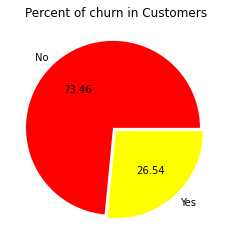

In [5]:
x = data['Churn'].value_counts(sort=True)
labels = x.index 
colors= ['red','yellow']
explode =(0.05,0)

plt.pie(x=x,explode=explode, labels=labels,colors=colors,autopct ='%1.2f')
plt.title('Percent of churn in Customers')

In [6]:
data['Churn']=data['Churn'].map(lambda x:1 if x=='Yes'else 0 )

In [7]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [8]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

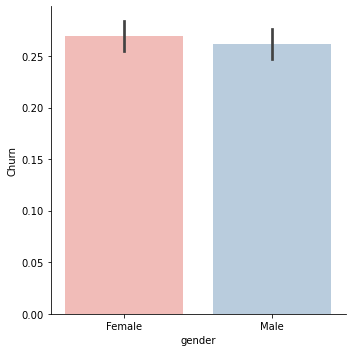

In [9]:
data['gender'].unique()
g = sns.factorplot(y='Churn',x='gender',data=data, kind='bar', palette ='Pastel1')
data = pd.get_dummies(data= data,columns=['gender'])

In [10]:
data['Partner'] = data['Partner'].map(lambda x:1 if x=='Yes'else 0 )

In [11]:
data['Dependents'] = data['Dependents'].map(lambda x:1 if x=='Yes'else 0 )

In [12]:
data['PhoneService'] = data['PhoneService'].map(lambda x:1 if x=='Yes'else 0 )

In [13]:
data['PaperlessBilling'] = data['PaperlessBilling'].map(lambda x:1 if x=='Yes'else 0 )

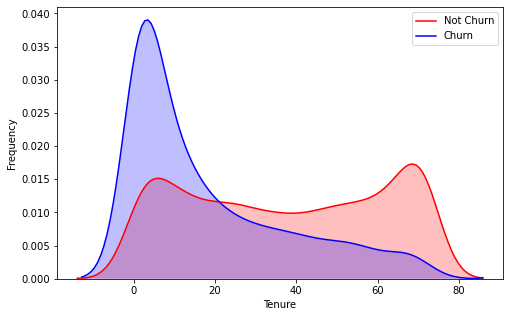

In [14]:
rcParams['figure.figsize']=8,5
a = sns.kdeplot(data.tenure[data['Churn']==0], color ='red',shade=True)
a = sns.kdeplot(data.tenure[data['Churn']==1], color ='blue',shade=True)
a.set_xlabel('Tenure')
a.set_ylabel('Frequency')
a =a.legend(['Not Churn','Churn'])

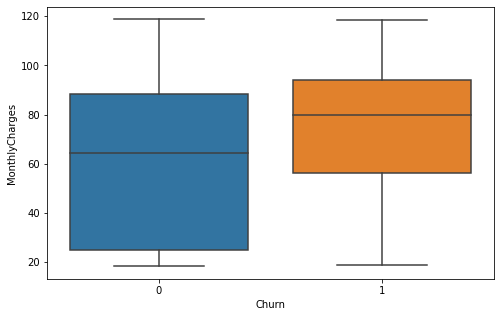

In [15]:
sns.boxplot(x = 'Churn', y= 'MonthlyCharges', data=data)

In [16]:
data['MultipleLines'].replace('No phone services','No', inplace=True)
data['MultipleLines'] = data['MultipleLines'].map(lambda x:1 if x=='Yes'else 0 )

In [17]:
data['Has_Internetservice'] = data['InternetService'].map(lambda x:0 if x=='No'else 1 )
data['Fiber_Optic'] = data['InternetService'].map(lambda x: 1 if x=='Fiber optic' else 0)
data['DSL'] = data['InternetService'].map(lambda x: 1 if x=='DSL' else 0)

In [18]:
data['OnlineSecurity'].replace('No phone services','No', inplace=True)
data['OnlineBackup'].replace('No phone services','No', inplace =True)
data['DeviceProtection'].replace('No phone services','No', inplace=True)
data['TechSupport'].replace('No phone services','No', inplace=True)
data['StreamingTV'].replace('No phone services','No', inplace=True)
data['StreamingMovies'].replace('No phone services','No', inplace=True)

data['OnlineSecurity']= data['OnlineSecurity'].map(lambda x:1 if x=='Yes' else 0)
data['OnlineBackup'] = data['OnlineBackup'].map(lambda x:1 if x == 'Yes' else 0)
data['DeviceProtection']= data['DeviceProtection'].map(lambda x:1 if x=='Yes' else 0)
data['TechSupport']= data['TechSupport'].map(lambda x:1 if x=='Yes' else 0)
data['StreamingTV']= data['StreamingTV'].map(lambda x:1 if x=='Yes' else 0)
data['StreamingMovies']= data['StreamingMovies'].map(lambda x:1 if x=='Yes' else 0)

In [19]:
data= pd.get_dummies(data= data, columns=['PaymentMethod'],drop_first=True)

In [20]:
data= pd.get_dummies(data= data, columns=['Contract'],drop_first=True)

### Assuming the monthly and total charges

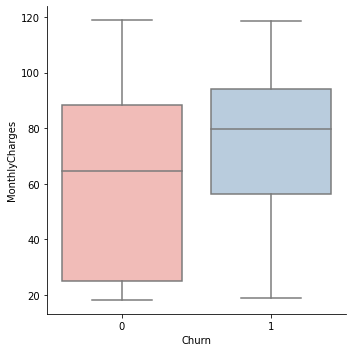

In [21]:
g = sns.factorplot(x ='Churn', y= 'MonthlyCharges', data = data, kind ='box', palette ='Pastel1')

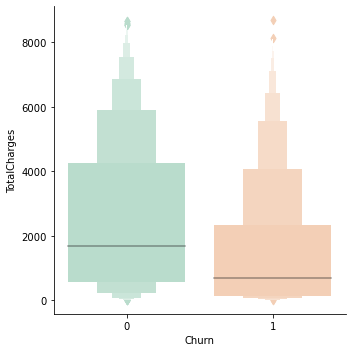

In [22]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors ='coerce')
g = sns.factorplot(y ='TotalCharges',x ='Churn', data= data, kind = 'boxen', palette ='Pastel2')

## Modeling 

In [23]:
data.isnull().sum()

SeniorCitizen                             0
Partner                                   0
Dependents                                0
tenure                                    0
PhoneService                              0
MultipleLines                             0
InternetService                           0
OnlineSecurity                            0
OnlineBackup                              0
DeviceProtection                          0
TechSupport                               0
StreamingTV                               0
StreamingMovies                           0
PaperlessBilling                          0
MonthlyCharges                            0
TotalCharges                             11
Churn                                     0
gender_Female                             0
gender_Male                               0
Has_Internetservice                       0
Fiber_Optic                               0
DSL                                       0
PaymentMethod_Credit card (autom

In [24]:
## Removing the missing values
data.dropna(inplace =True)

In [25]:
data['TotalCharges'].isnull().sum()

0

In [26]:
data.drop(['Partner','Dependents','Dependents','PhoneService','PaperlessBilling','MultipleLines',
          'InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV',
          'StreamingMovies'],axis=1, inplace=True)

In [27]:
data.columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_Female', 'gender_Male', 'Has_Internetservice', 'Fiber_Optic',
       'DSL', 'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [28]:
data['Churn'] = data['Churn'].astype(int)
Y_train = data['Churn']
X_train = data.drop(labels = ['Churn'], axis =1)

In [29]:
from sklearn.tree import DecisionTreeClassifier
# Initialize our decision tree object
clasification_tree = DecisionTreeClassifier(max_depth= 4)
# Train our decision tree (tree induction + pruning)
classification_tree = clasification_tree.fit(X_train,Y_train)

#### Below are the 4 ways to visualize Decision Tree in Python:

--> print text representation of the tree with sklearn.tree.export_text method<br>
--> plot with sklearn.tree.plot_tree method (matplotlib needed)<br>
--> plot with sklearn.tree.export_graphviz method (graphviz needed)<br>
--> plot with dtreeviz package (dtreeviz and graphviz needed)<br>

In [30]:
from sklearn.tree.export import export_text

In [31]:
tree_text = export_text(classification_tree)
print(tree_text)

|--- feature_1 <= 16.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_1 <= 3.50
|   |   |   |--- feature_8 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_8 >  0.50
|   |   |   |   |--- class: 1
|   |   |--- feature_1 >  3.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- class: 0
|   |--- feature_7 >  0.50
|   |   |--- feature_3 <= 120.00
|   |   |   |--- feature_2 <= 69.88
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  69.88
|   |   |   |   |--- class: 1
|   |   |--- feature_3 >  120.00
|   |   |   |--- feature_2 <= 78.92
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  78.92
|   |   |   |   |--- class: 1
|--- feature_1 >  16.50
|   |--- feature_7 <= 0.50
|   |   |--- feature_13 <= 0.50
|   |   |   |--- feature_6 <= 0.50
|   |   |   |   |--- class: 0
|   |   |   |--- feature_6 >  0.50
|   |   |   |   |--- class: 0
|   |   |--- feature_13 >  0.50
|   |   |   |--- feature_

### Plot Tree with plot_tree
The plot_tree method was added to sklearn in version 0.21. It requires matplotlib to be installed. It allows us to easily produce figure of the tree (without intermediate exporting to graphviz) The more information about plot_tree arguments are in the docs.

[Text(418.5, 978.48, 'X[1] <= 16.5\ngini = 0.39\nsamples = 7032\nvalue = [5163, 1869]'),
 Text(209.25, 761.0400000000001, 'X[7] <= 0.5\ngini = 0.497\nsamples = 2539\nvalue = [1375, 1164]'),
 Text(104.625, 543.6, 'X[1] <= 3.5\ngini = 0.414\nsamples = 1451\nvalue = [1027, 424]'),
 Text(52.3125, 326.1600000000001, 'X[8] <= 0.5\ngini = 0.49\nsamples = 617\nvalue = [353, 264]'),
 Text(26.15625, 108.72000000000003, 'gini = 0.401\nsamples = 252\nvalue = [182, 70]'),
 Text(78.46875, 108.72000000000003, 'gini = 0.498\nsamples = 365\nvalue = [171, 194]'),
 Text(156.9375, 326.1600000000001, 'X[6] <= 0.5\ngini = 0.31\nsamples = 834\nvalue = [674, 160]'),
 Text(130.78125, 108.72000000000003, 'gini = 0.152\nsamples = 339\nvalue = [311, 28]'),
 Text(183.09375, 108.72000000000003, 'gini = 0.391\nsamples = 495\nvalue = [363, 132]'),
 Text(313.875, 543.6, 'X[3] <= 120.0\ngini = 0.435\nsamples = 1088\nvalue = [348, 740]'),
 Text(261.5625, 326.1600000000001, 'X[2] <= 69.875\ngini = 0.233\nsamples = 238\nv

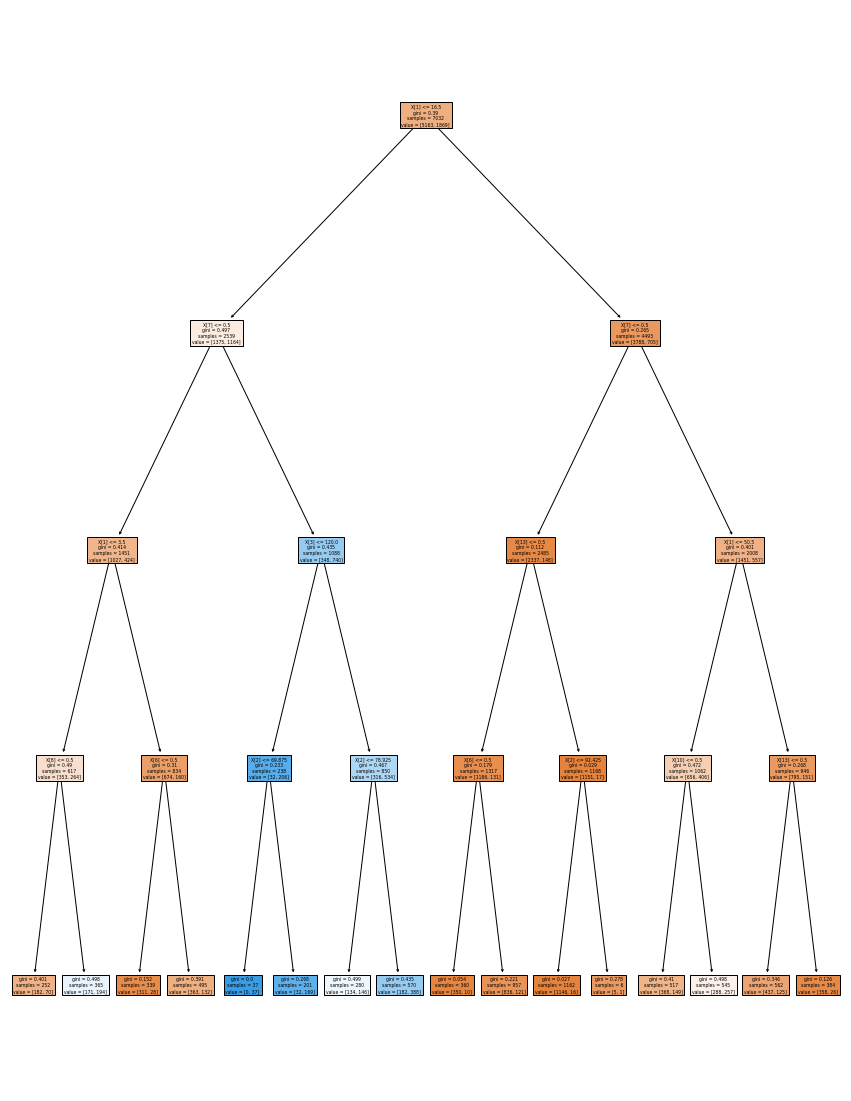

In [32]:
from sklearn import tree
fig = plt.figure(figsize =(15,20))
tree.plot_tree(classification_tree, filled = True)

### Visualize Decision Tree with graphviz
Please make sure that you have graphviz installed (pip install graphviz). To plot the tree first we need to export it to DOT format with export_graphviz method (link to docs). Then we can plot it in the notebook or save to the file.

In [33]:
from sklearn.tree import export_graphviz
import os     
os.environ["PATH"] += os.pathsep + r'C:\Users\NAVJOT\anaconda3\pkgs\graphviz-2.38-hfd603c8_2\Library\bin\graphviz'      #the path to Graphiz files
import pydotplus

In [34]:
dot_data = tree.export_graphviz(classification_tree, out_file=None, filled = True)

graph = pydotplus.graph_from_dot_data(dot_data)
graph

###   Cross Validation techniques
Below code makes some predictions on the test data. We are using cross-validation here in order to avoid bias while testing the model for accuracy.

In [35]:
from sklearn.model_selection import cross_val_score
# 10 folds cross validation
clf_score = cross_val_score(classification_tree,X_train,Y_train, cv=10)
print(clf_score)
clf_score.mean()

[0.77982955 0.80681818 0.78947368 0.78805121 0.78093883 0.77382646
 0.79943101 0.78378378 0.78093883 0.80085349]


0.7883945024570025

#### Feature Importance
One great aspect of rule-based learning is that we can actually visualise how important a given feature is towards predicting our target variable. Below code forms a chart showing the relative importance of the features present in the data towards the prediction of our target churn class.

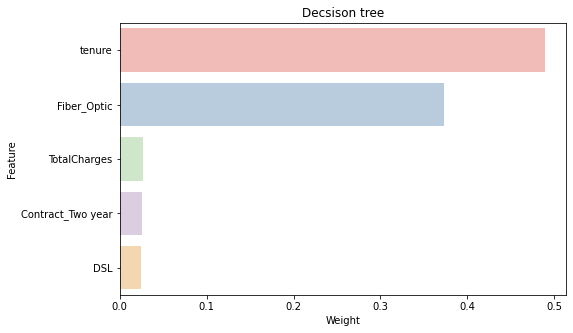

In [36]:
Rfclf_fea = pd.DataFrame(clasification_tree.feature_importances_)
Rfclf_fea['Feature'] = list(X_train)
Rfclf_fea.sort_values(by =0, ascending = False).head()

g = sns.barplot(0,'Feature',data = Rfclf_fea.sort_values(by =0, ascending = False)[0:5], palette = 'Pastel1', orient ='h')
g.set_xlabel("Weight")
g= g.set_title("Decsison tree")

### Evaluation of the Classification Model
In order to evaluate our classification model, we are using the confusion matrix. A confusion matrix is a table that is often used to describe the performance of a classification model (or “classifier”) on a set of test data for which the true values are known.

In [38]:
# confusion Matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

y_pred = classification_tree.predict(X_train)
probs = classification_tree.predict_proba(X_train)
print(confusion_matrix(Y_train,y_pred))

# calculate AUC
auc = roc_auc_score(Y_train, probs[:,1])
print('AUC: %.3f' % auc)
print(Y_train.shape)
print(probs.shape)

[[4644  519]
 [ 935  934]]
AUC: 0.831
(7032,)
(7032, 2)


### ROC AUC Curve
Following code generates the ROC curve for the predictions performed by our decision tree classifier. More the area under the ROC curve, better the prediction capability of the decision tree classifier.

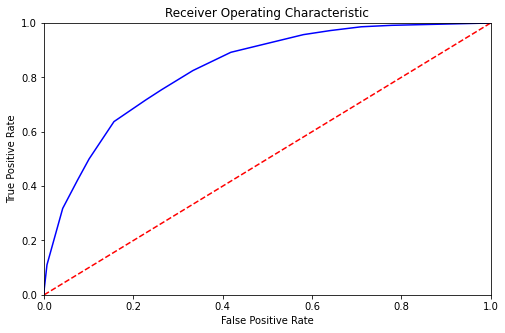

In [39]:
from sklearn.metrics import roc_curve

# calculate the fpr and tpr for all threshold of the classification
fpr, tpr, threshold = roc_curve(Y_train, probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel("True Positive Rate")
plt.xlabel('False Positive Rate')
plt.show()

Below code makes a precision vs recall curve on the basis of the predictions. A precision-recall curve is a better indicator of the model performance than the ROC curve in case of imbalance in the target variable.

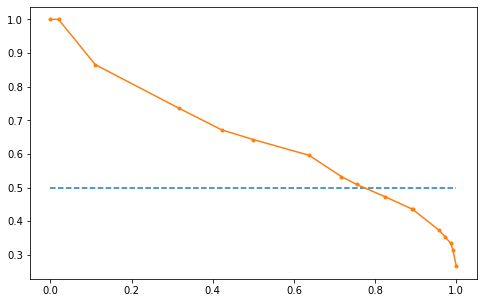

In [45]:
from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

precision, recall, thresholds = precision_recall_curve(Y_train, probs[:,1])
# plot no skill
pyplot.plot([0,1],[0.5,0.5], linestyle ='--')
# plot the roc curve for the model
pyplot.plot(recall, precision, marker ='.')